<a href="https://colab.research.google.com/github/nayun12/Tobigs_17/blob/main/Week5_Ensemble_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

# 데이터 이해하기

### 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

## 칼럼 설명

- feature
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
 - Months_on_book : Period of relationship with bank
 - Total_Relationship_Count : Total no. of products held by the customer
 - Months_Inactive_12_mon : No. of months inactive in the last 12 months
 - Contacts_Count_12_mon : No. of Contacts in the last 12 months
 - Credit_Limit : Credit Limit on the Credit Card
 - Total_Revolving_Bal : Total Revolving Balance on the Credit Card
 - Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)
 - Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)
 - Total_Trans_Amt : Total Transaction Amount (Last 12 months)
 - Total_Trans_Ct : Total Transaction Count (Last 12 months)
 - Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)
 - Avg_Utilization_Ratio : Average Card Utilization Ratio

- target
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1
1. 은행 카드 서비스 담당자의 입장

2. 카드 서비스를 이용하는 고객의 입장

위 두 가지를 생각하면서 데이터를 분석하는 것은 어떨까요??

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 평가방식

평가방식은 Logloss이기 때문에 predict_proba을 통해서 각 클래스의 예측 확률을 구하는 방식으로 에측을 해야합니다!

## 대회 주소
https://www.kaggle.com/t/cd058141be084c4f81c9df010c587ae4

In [ ]:
# 데이터의 경로 각자에 맞추어서 변경해주세요
data_dir = '/content/drive/MyDrive/Tobigs/17기 5주차 Ensemble 강의 자료/'

train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')
submission = pd.read_csv(data_dir + 'sample_submission.csv')

In [ ]:
train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,F,1,Unknown,Divorced,Unknown,Blue,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,M,3,Uneducated,Single,$60K - $80K,Blue,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,M,0,Uneducated,Divorced,$80K - $120K,Blue,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,F,1,Graduate,Single,$40K - $60K,Blue,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,F,0,Uneducated,Married,Less than $40K,Blue,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0


In [ ]:
test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,F,2,College,Single,Less than $40K,Blue,45,6,3,3,6210.0,1083,5127.0,0.621,3095,62,0.590,0.174
1,52,M,1,College,Married,$80K - $120K,Blue,48,4,3,3,2066.0,1601,465.0,0.742,1578,41,0.414,0.775
2,27,M,0,Unknown,Married,$40K - $60K,Blue,14,4,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
3,43,M,3,Unknown,Single,$60K - $80K,Blue,34,6,2,0,13771.0,2517,11254.0,0.501,1510,42,0.750,0.183
4,55,F,2,High School,Married,$40K - $60K,Blue,42,2,2,3,5431.0,2007,3424.0,0.661,4569,82,0.608,0.370


In [ ]:
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1


# 데이터 전처리


In [ ]:
train.shape

(8101, 20)

In [ ]:
test.shape

(2026, 19)

In [ ]:
train.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [ ]:
test.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

데이터에 결측치는 존재하지 않는 것으로 보입니다.

하지만 진짜 결측치가 존재하지 않을까요?

결측치가 다른 이름으로 기록되어 있을 수도 있고 0으로 기록되어 있을 수도 있습니다.

이 부분은 한번 EDA를 통해서 확인해보세요!

# EDA

정형데이터의 경우 feature engineering 이 모델의 성능에 정말 큰 영향을 주기 때문에 EDA를 통해서 얻은 인사이트를 바탕으로 최고의 feature를 만들어보세요! 

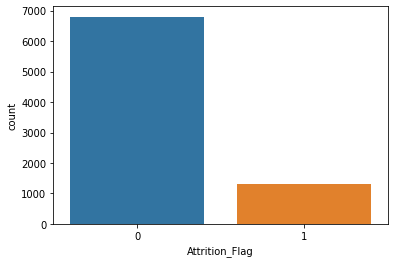

In [ ]:
sns.countplot(train['Attrition_Flag'])

In [ ]:
def graph(name):
    f, ax = plt.subplots(1, 2, figsize=(18, 8))
    train[name].value_counts().plot(kind='pie',
                                          autopct='%1.1f%%',
                                          ax = ax[0],
                                          shadow=True
                                         )
    sns.countplot(name, data=train, ax=ax[1], hue ='Attrition_Flag')
    ax[1].set_title(name+'_Attrition')


    g =train.groupby(name)['Attrition_Flag'].value_counts(normalize=True).unstack().plot(kind="bar", 
                                                                                  legend=True , 
                                                                                  stacked= True ,
                                                                                  )
    g.set_title(name+'_Attrition_ratio')

    plt.show()

    print(pd.crosstab(train[name],train['Attrition_Flag']))

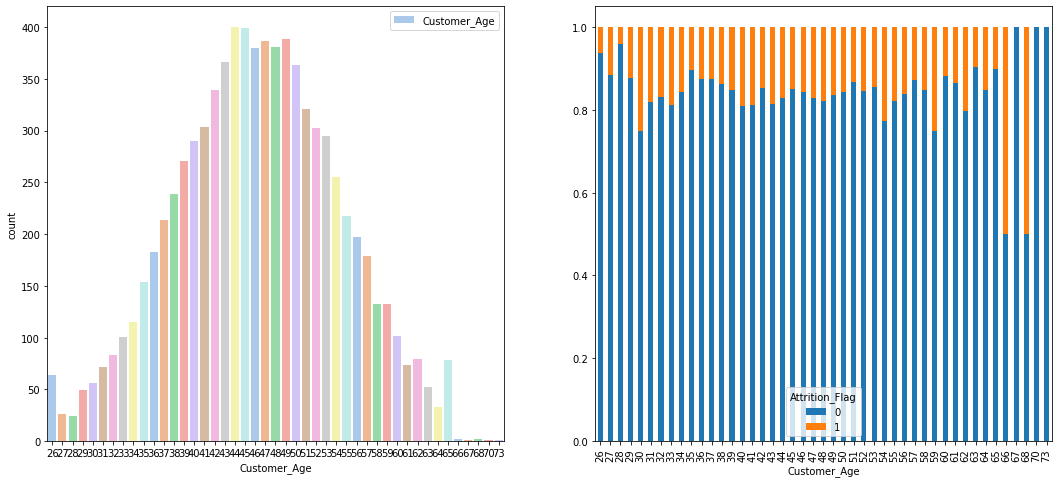

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

g = sns.countplot(train['Customer_Age'], palette = 'pastel', label = 'Customer_Age', ax = ax[0])
g.legend()

train.groupby("Customer_Age")['Attrition_Flag'].value_counts(normalize=True).unstack().plot(kind="bar", 
                                                                              legend=True , 
                                                                              stacked= True ,
                                                                            ax = ax[1]
                                                                              )

plt.show()

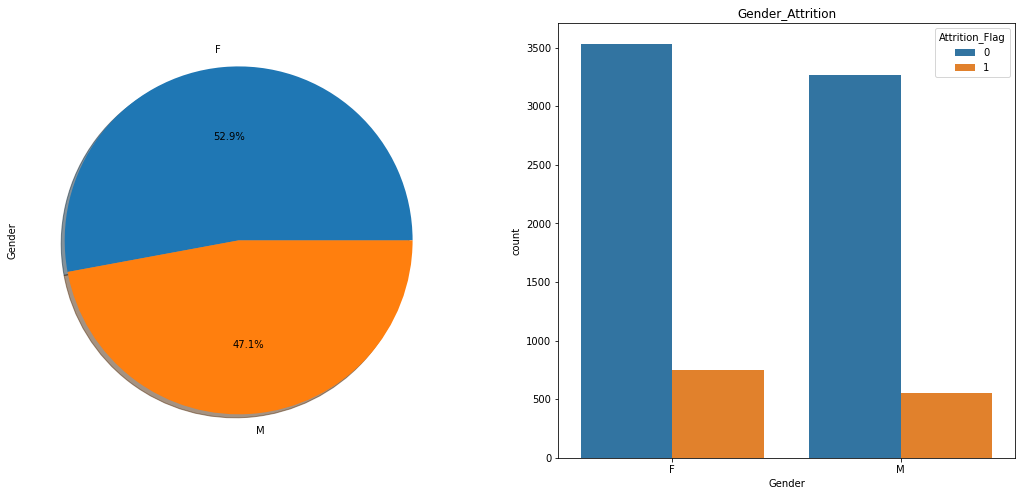

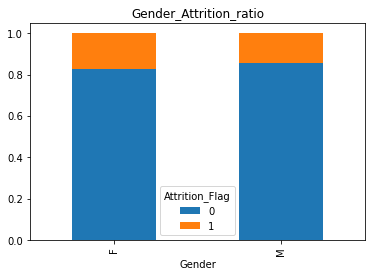

Attrition_Flag     0    1
Gender                   
F               3534  752
M               3265  550


In [ ]:
graph("Gender")

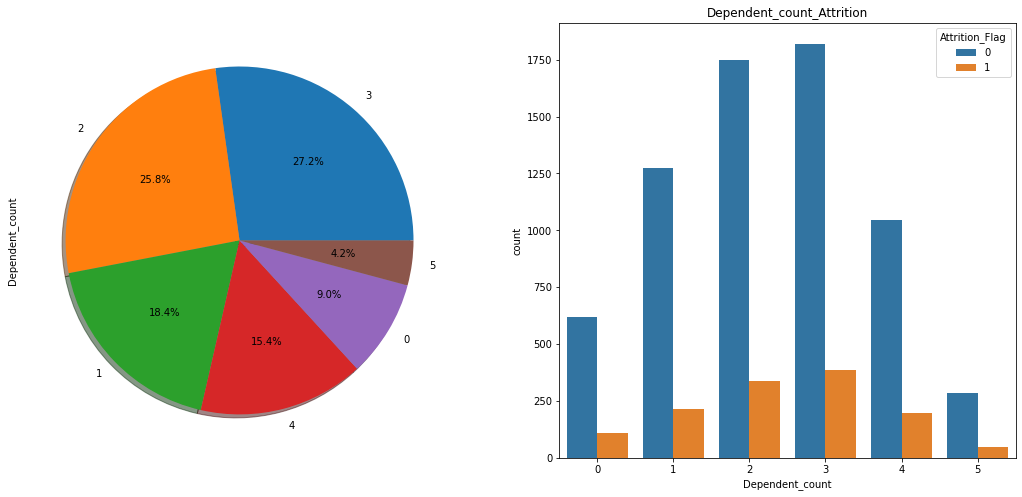

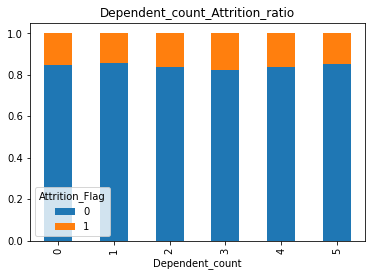

Attrition_Flag      0    1
Dependent_count           
0                 621  111
1                1275  216
2                1749  340
3                1820  386
4                1047  199
5                 287   50


In [ ]:
graph('Dependent_count')

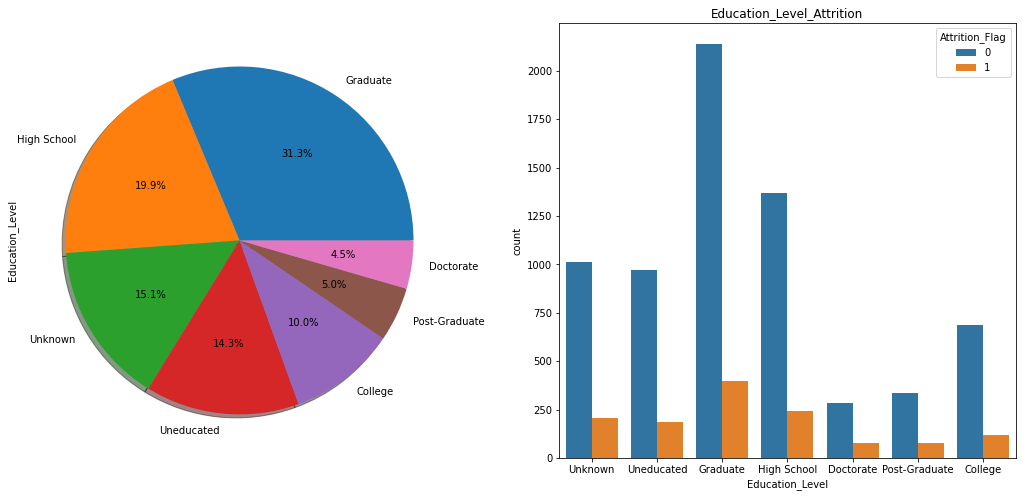

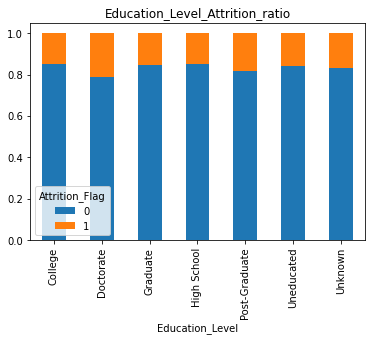

Attrition_Flag      0    1
Education_Level           
College           687  120
Doctorate         286   77
Graduate         2140  395
High School      1368  241
Post-Graduate     334   75
Uneducated        972  186
Unknown          1012  208


In [ ]:
graph("Education_Level")

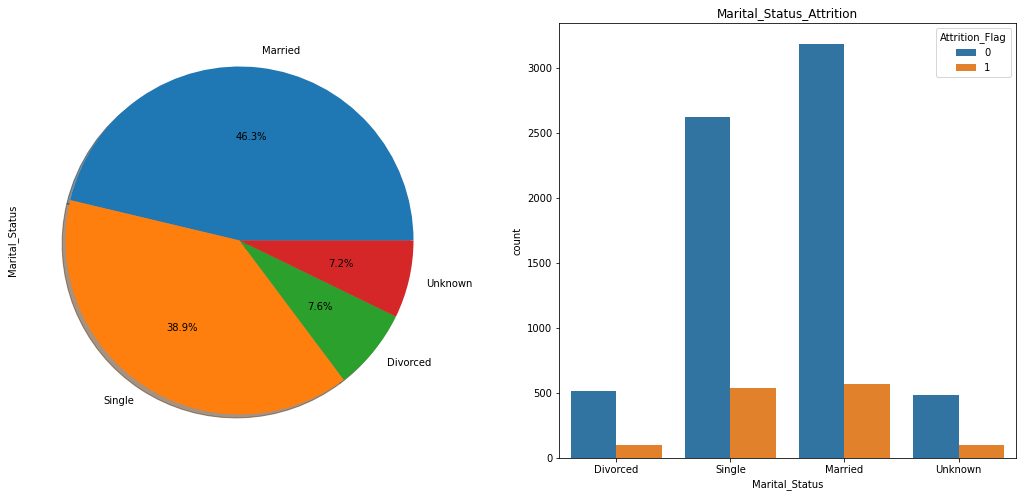

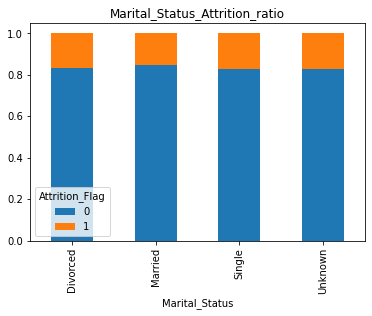

Attrition_Flag     0    1
Marital_Status           
Divorced         511  102
Married         3184  565
Single          2619  536
Unknown          485   99


In [ ]:
graph('Marital_Status')

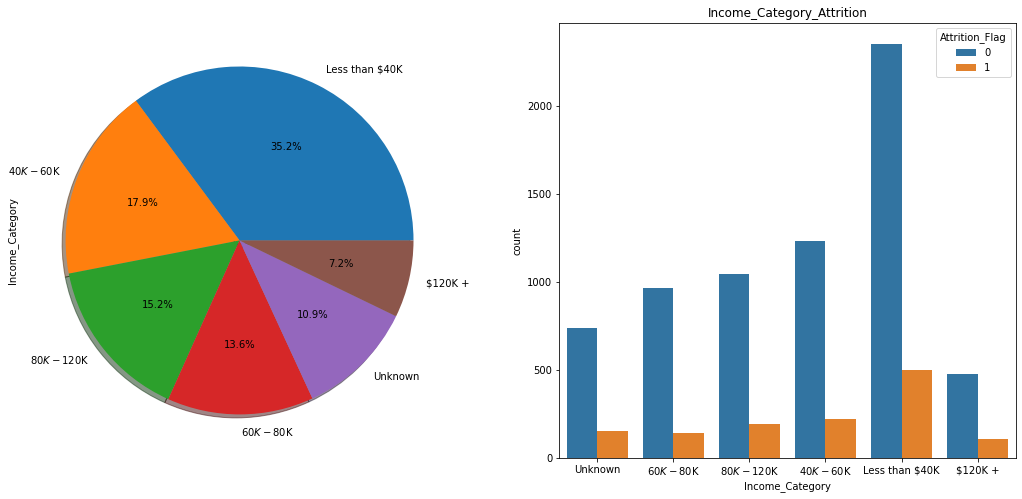

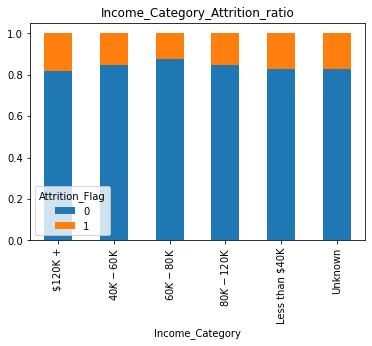

Attrition_Flag      0    1
Income_Category           
$120K +           476  105
$40K - $60K      1231  219
$60K - $80K       962  139
$80K - $120K     1043  191
Less than $40K   2351  497
Unknown           736  151


In [ ]:
graph('Income_Category')

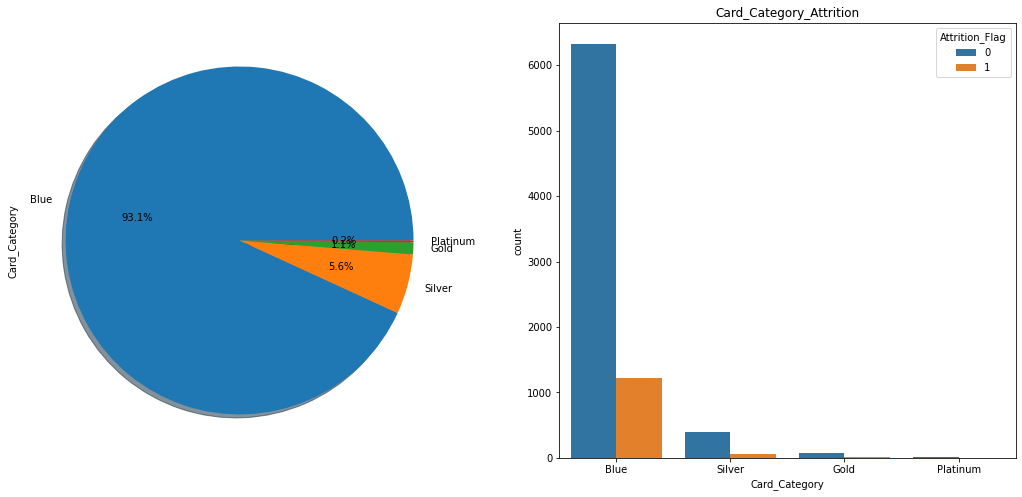

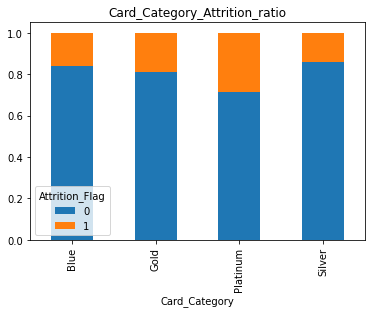

Attrition_Flag     0     1
Card_Category             
Blue            6328  1218
Gold              73    17
Platinum          10     4
Silver           388    63


In [ ]:
graph('Card_Category')

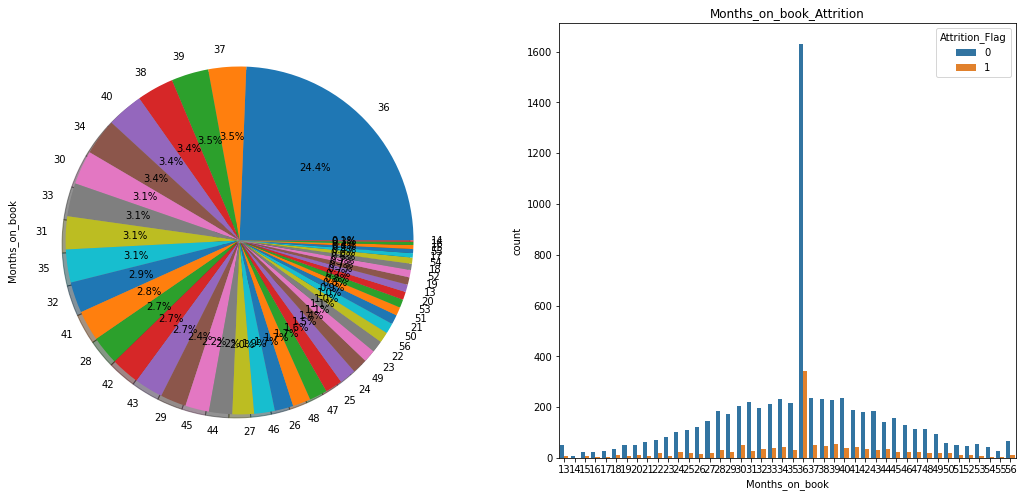

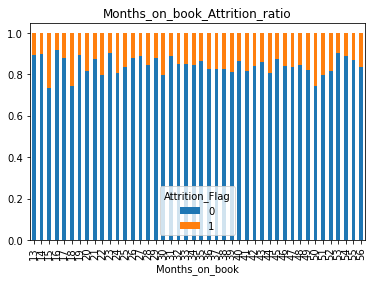

Attrition_Flag     0    1
Months_on_book           
13                50    6
14                 9    1
15                22    8
16                22    2
17                29    4
18                35   12
19                50    6
20                49   11
21                62    9
22                70   18
23                84    9
24               101   24
25               108   21
26               123   17
27               145   18
28               183   33
29               171   23
30               203   52
31               220   28
32               197   35
33               213   37
34               231   42
35               215   33
36              1631  344
37               235   50
38               230   48
39               227   53
40               237   37
41               187   42
42               182   34
43               185   30
44               141   34
45               157   22
46               130   25
47               113   22
48               114   21
49          

In [ ]:
graph('Months_on_book')

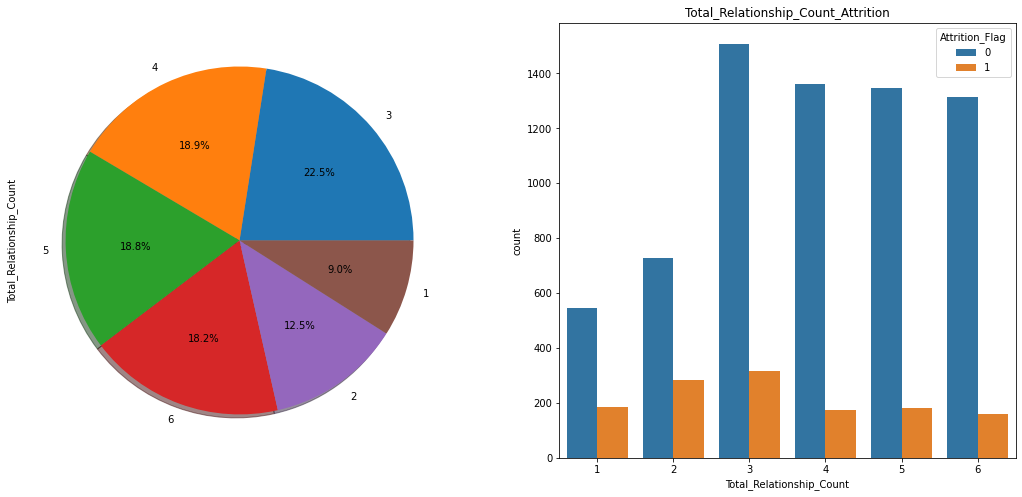

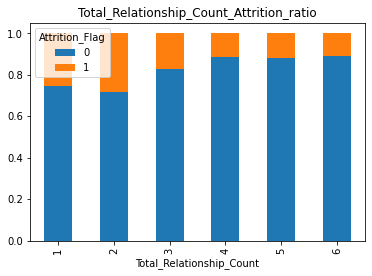

Attrition_Flag               0    1
Total_Relationship_Count           
1                          544  184
2                          726  285
3                         1508  317
4                         1362  173
5                         1345  182
6                         1314  161


In [ ]:
graph('Total_Relationship_Count')

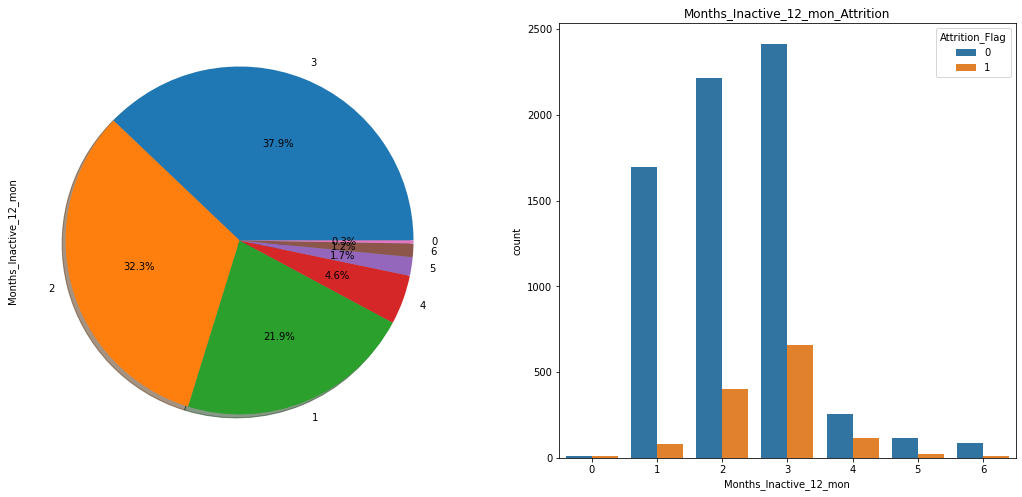

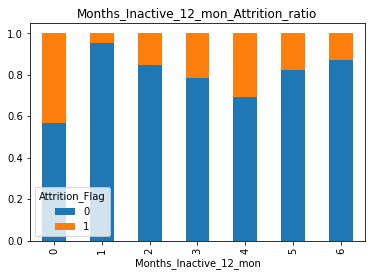

Attrition_Flag             0    1
Months_Inactive_12_mon           
0                         13   10
1                       1695   82
2                       2217  402
3                       2414  656
4                        257  114
5                        115   25
6                         88   13


In [ ]:
graph("Months_Inactive_12_mon")

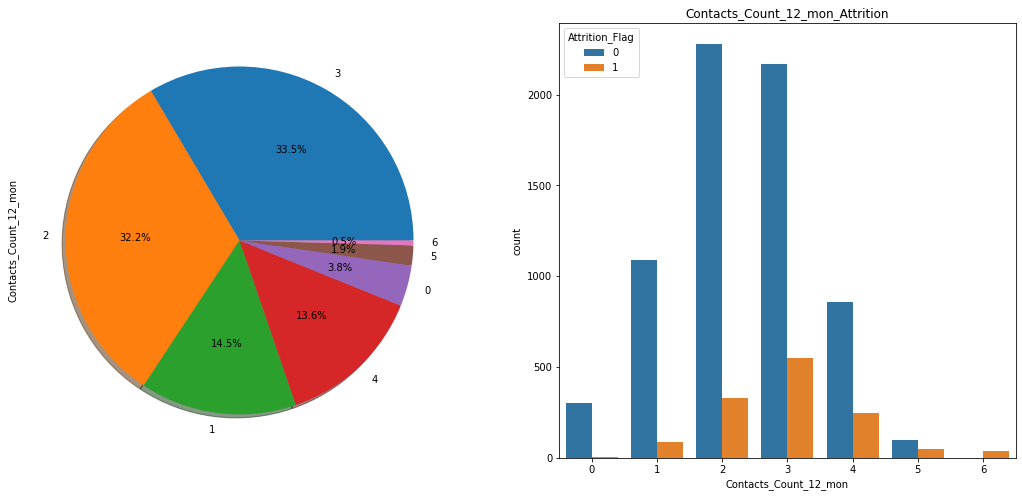

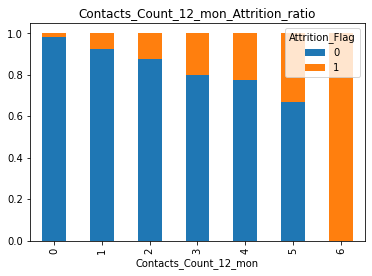

Attrition_Flag            0    1
Contacts_Count_12_mon           
0                       302    5
1                      1092   86
2                      2280  328
3                      2167  548
4                       857  248
5                       101   50
6                         0   37


In [ ]:
graph("Contacts_Count_12_mon")

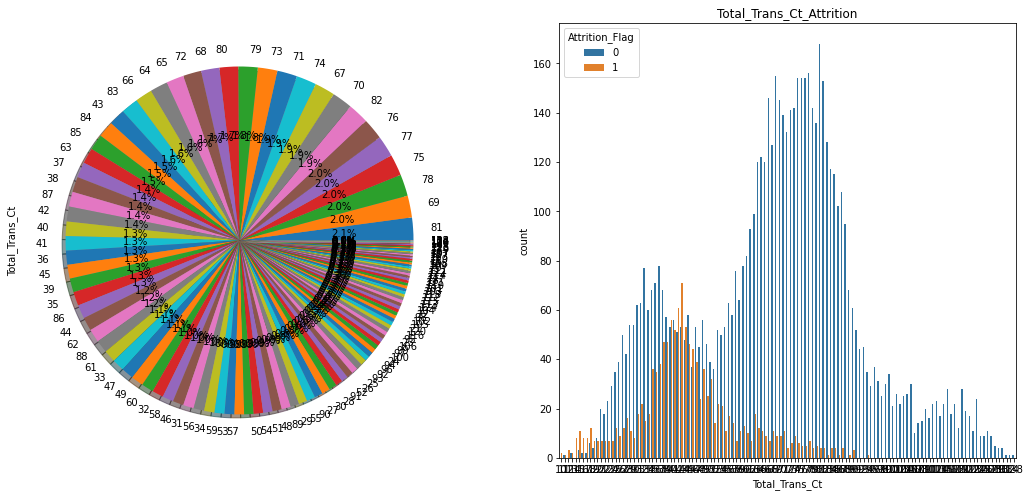

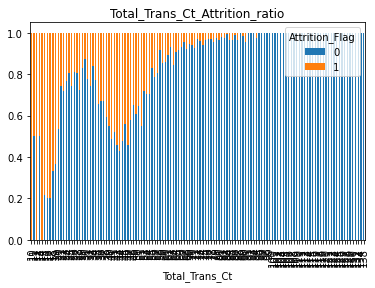

Attrition_Flag  0  1
Total_Trans_Ct      
10              0  2
11              1  1
12              0  3
13              2  2
14              0  8
...            .. ..
130             4  0
131             4  0
132             1  0
134             1  0
138             1  0

[125 rows x 2 columns]


In [ ]:
graph("Total_Trans_Ct")

# Model

저는 라벨인코딩만을 이용한 간단한 베이스 라인 모델을 만들었습니다.

17기 분들은 feature engineering, 하이퍼 파라미터 튜닝, 앙상블 등 다양한 방법으로 성능이 우수한 모델을 만들어보세요!

In [ ]:
train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,F,1,Unknown,Divorced,Unknown,Blue,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,M,3,Uneducated,Single,$60K - $80K,Blue,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,M,0,Uneducated,Divorced,$80K - $120K,Blue,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,F,1,Graduate,Single,$40K - $60K,Blue,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,F,0,Uneducated,Married,Less than $40K,Blue,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,46,F,3,Graduate,Divorced,Less than $40K,Blue,36,3,2,2,2391.0,1625,766.0,0.662,7649,101,0.603,0.680,0
8097,37,M,3,Uneducated,Married,$40K - $60K,Blue,25,5,0,3,1438.3,0,1438.3,1.023,5046,77,0.925,0.000,0
8098,50,F,1,Graduate,Married,Less than $40K,Blue,36,4,2,3,1438.3,0,1438.3,0.851,4765,71,1.088,0.000,0
8099,55,F,2,High School,Married,Less than $40K,Blue,45,5,2,0,3187.0,2517,670.0,1.144,1627,38,0.652,0.790,0


In [ ]:
categorical_columns = train.columns[train.dtypes =='object']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
temp_train = train[categorical_columns]
temp_test = test[categorical_columns]
for col in categorical_columns:
    encoder.fit(temp_train[col])
    train[col] = encoder.transform(temp_train[col])
    test[col] = encoder.transform(temp_test[col])   

In [ ]:
train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,0,1,6,0,5,0,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,1,3,5,2,2,0,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,1,0,5,0,3,0,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,0,1,2,2,1,0,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,0,0,5,1,4,0,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,46,0,3,2,0,4,0,36,3,2,2,2391.0,1625,766.0,0.662,7649,101,0.603,0.680,0
8097,37,1,3,5,1,1,0,25,5,0,3,1438.3,0,1438.3,1.023,5046,77,0.925,0.000,0
8098,50,0,1,2,1,4,0,36,4,2,3,1438.3,0,1438.3,0.851,4765,71,1.088,0.000,0
8099,55,0,2,3,1,4,0,45,5,2,0,3187.0,2517,670.0,1.144,1627,38,0.652,0.790,0


In [ ]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [ ]:
X.shape, y.shape

((8101, 19), (8101,))

In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 2021, stratify = y)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

xgb_clf = XGBClassifier(random_state = 2021,n_estimators = 500)



In [ ]:
for clf in [xgb_clf, lgbm_clf]:
    clf.fit(train_X, train_y)
    y_pred = clf.predict_proba(val_X)
    print(clf.__class__.__name__,'Logloss Score:' , log_loss(val_y, y_pred))
    print(clf.__class__.__name__,'Accuracy Score:' , accuracy_score(val_y, np.argmax(y_pred, axis = 1)))

XGBClassifier Logloss Score: 0.07496805070239011
XGBClassifier Accuracy Score: 0.9691548426896978

LGBMClassifier Logloss Score: 0.1291351295997969
LGBMClassifier Accuracy Score: 0.9703886489821099



출력결과가 저장이 잘 되지 않았는데 LGBM결과가 좋지 않아서XGB만 썼습니다.

In [ ]:
xgb_clf.fit(train_X, train_y)
xgb_y_pred = xgb_clf.predict_proba(val_X)
print(xgb_clf.__class__.__name__,'Logloss Score:' , log_loss(val_y, xgb_y_pred))
print(xgb_clf.__class__.__name__,'Accuracy Score:' , accuracy_score(val_y, np.argmax(xgb_y_pred, axis = 1)))

XGBClassifier Logloss Score: 0.07496805070239011
XGBClassifier Accuracy Score: 0.9691548426896978
LGBMClassifier Logloss Score: 0.1291351295997969
LGBMClassifier Accuracy Score: 0.9703886489821099


In [ ]:
log_loss(val_y,xgb_y_pred)

0.07251949479774782

# 예측

저는 Stacking 사용했지만 17기 분들은 다양한 방식을 활용해서 모델의 성능을 높여주세요!

In [ ]:
xgb_pred = xgb_clf.predict_proba(test)

In [ ]:
xgb_pred

array([[9.8898268e-01, 1.1017342e-02],
       [9.9881107e-01, 1.1889203e-03],
       [8.8460749e-01, 1.1539252e-01],
       ...,
       [9.9995446e-01, 4.5515168e-05],
       [9.9992603e-01, 7.3966199e-05],
       [9.9951041e-01, 4.8961787e-04]], dtype=float32)

In [ ]:
submission.iloc[:, 1:] = xgb_pred
submission.to_csv(data_dir + 'your_model_tunned.csv', index = False)
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0.988983,0.011017
1,1,0.998811,0.001189
2,2,0.884607,0.115393
3,3,0.997271,0.002729
4,4,0.999885,0.000115
